In [1]:
import pandas as pd
import numpy as np
from os.path import join
import os
import requests
import pickle
import rdkit

import warnings
warnings.filterwarnings("ignore")
CURRENT_DIR = os.getcwd()
os.chdir(CURRENT_DIR)

In [2]:
pd.set_option("display.max_colwidth", 15)

### Script to add input features to predict log_km of wild type enzymes

In [3]:
df = pd.read_pickle(join("files","final_brenda_sabio_wt_mut_df.pkl"))
df

ec       substrate uniprot          smiles enzyme_type       km  \
0      1.1.1.1         ethanol  Q6L0S1             CCO   wild type  [0.056]   
1      1.1.1.1            nadh  B2ZRE3  C1C=CN(C=C1...   wild type   [0.01]   
2      1.1.1.1         ethanol  Q9HIM3             CCO   wild type    [5.7]   
3      1.1.1.1         ethanol  V9SFA1             CCO   wild type   [17.0]   
4      1.1.1.1  2-hydroxyme...  P08319  C1=CC2=C3C(...   wild type  [0.033]   
...        ...             ...     ...             ...         ...      ...   
22562  3.5.2.6    Penicillin G  P04190  CC1(C(N2C(S...      mutant   [1.55]   
22563  3.5.2.6    Penicillin G  P04190  CC1(C(N2C(S...      mutant    [1.9]   
22564  3.5.2.6    Penicillin G  P04190  CC1(C(N2C(S...      mutant   [6.77]   
22565  3.5.2.6    Penicillin G  P04190  CC1(C(N2C(S...      mutant    [2.7]   
22566  6.4.1.1        Pyruvate  P11498  CC(=O)C(=O)...      mutant   [0.08]   

       km_count  km_gmean    log_km        sequence    sequence_id  \
0             1     0.056 -1.251812  MRAIVLERFGI...  sequence_2418   
1             1     0.010 -2.000000  MRAVVFENKER...  sequence_6935   
2             1     5.700  0.755875  MKAALVYEPLG...  sequence_1796   
3             1    17.000  1.230449  MFRLARAQTSI...  sequence_5411   
4             1     0.033 -1.481486  MGTKGKVIKCK...  sequence_3884   
...         ...       ...       ...             ...            ...   
22562         1     1.550  0.190332  MKKNTLLKVGL...   sequence_372   
22563         1     1.900  0.278754  MKKNTLLKVGL...   sequence_372   
22564         1     6.770  0.830589  MKKNTLLKVGL...   sequence_372   
22565         1     2.700  0.431364  MKKNTLLKVGL...   sequence_372   
22566         1     0.080 -1.096910  MLKFRTVHGGL...   sequence_191   

                 esm2 mutations mutated_sequence mut_sequence_id  \
0      [0.03968055...       NaN             NaN              NaN   
1      [0.00051875...       NaN             NaN              NaN   
2      [-0.0096468...       NaN             NaN              NaN   
3      [0.00740973...       NaN             NaN              NaN   
4      [-0.0142218...       NaN             NaN              NaN   
...               ...       ...             ...              ...   
22562             NaN     D120E  MKKNTLLKVGL...     sequence_470   
22563             NaN     D120N  MKKNTLLKVGL...     sequence_471   
22564             NaN     D120Q  MKKNTLLKVGL...     sequence_472   
22565             NaN     D120S  MKKNTLLKVGL...     sequence_473   
22566             NaN     A610T  MLKFRTVHGGL...     sequence_474   

             esm2_mut      ChemBERTa2 esm2_ChemBERTa2  
0                 NaN  [-0.1174415...  [0.03968055...  
1                 NaN  [0.717974, ...  [0.00051875...  
2                 NaN  [-0.1174415...  [-0.0096468...  
3                 NaN  [-0.1174415...  [0.00740973...  
4                 NaN  [-0.0862370...  [-0.0142218...  
...               ...             ...             ...  
22562  [0.01016215...  [-0.1734156...  [0.01016215...  
22563  [0.00956034...  [-0.1734156...  [0.00956034...  
22564  [0.00936633...  [-0.1734156...  [0.00936633...  
22565  [0.00943704...  [-0.1734156...  [0.00943704...  
22566  [0.02490705...  [-0.2152351...  [0.02490705...  

[22567 rows x 18 columns]

In [4]:
df_wt = df[df["enzyme_type"] == "wild type"].copy()
df_wt = df_wt.drop(columns=["mutations", "mutated_sequence", "mut_sequence_id", "esm2_mut"])
df_wt

ec       substrate uniprot          smiles enzyme_type  \
0       1.1.1.1         ethanol  Q6L0S1             CCO   wild type   
1       1.1.1.1            nadh  B2ZRE3  C1C=CN(C=C1...   wild type   
2       1.1.1.1         ethanol  Q9HIM3             CCO   wild type   
3       1.1.1.1         ethanol  V9SFA1             CCO   wild type   
4       1.1.1.1  2-hydroxyme...  P08319  C1=CC2=C3C(...   wild type   
...         ...             ...     ...             ...         ...   
16313  1.1.1.40            Mn2+  Q16798          [Mn+2]   wild type   
16314  1.1.1.40           NADPH  P48163  C1C=CN(C=C1...   wild type   
16315  1.1.1.40             CO2  P48163         C(=O)=O   wild type   
16316  1.1.1.44  6-Phospho-D...  Q7TP11  C(C(C(C(C(C...   wild type   
16317  1.1.1.44           NADP+  Q7TP11  C1=CC(=C[N+...   wild type   

                   km  km_count   km_gmean    log_km        sequence  \
0             [0.056]         1   0.056000 -1.251812  MRAIVLERFGI...   
1              [0.01]         1   0.010000 -2.000000  MRAVVFENKER...   
2               [5.7]         1   5.700000  0.755875  MKAALVYEPLG...   
3              [17.0]         1  17.000000  1.230449  MFRLARAQTSI...   
4             [0.033]         1   0.033000 -1.481486  MGTKGKVIKCK...   
...               ...       ...        ...       ...             ...   
16313        [0.0042]         1   0.004200 -2.376751  MGAALGTGTRL...   
16314        [0.0031]         1   0.003100 -2.508638  MEPEAPRRRHT...   
16315          [23.0]         1  23.000000  1.361728  MEPEAPRRRHT...   
16316  [0.146, 0.0...         4   0.070586 -1.151280  MDQKTPEANSR...   
16317  [0.258, 0.0...         4   0.169900 -0.769807  MDQKTPEANSR...   

         sequence_id            esm2      ChemBERTa2 esm2_ChemBERTa2  
0      sequence_2418  [0.03968055...  [-0.1174415...  [0.03968055...  
1      sequence_6935  [0.00051875...  [0.717974, ...  [0.00051875...  
2      sequence_1796  [-0.0096468...  [-0.1174415...  [-0.0096468...  
3      sequence_5411  [0.00740973...  [-0.1174415...  [0.00740973...  
4      sequence_3884  [-0.0142218...  [-0.0862370...  [-0.0142218...  
...              ...             ...             ...             ...  
16313   sequence_170  [0.06878645...  [-0.1737446...  [0.06878645...  
16314    sequence_18  [0.08767573...  [0.8569791,...  [0.08767573...  
16315    sequence_18  [0.08767573...  [0.06829116...  [0.08767573...  
16316   sequence_362  [0.04873527...  [-0.3554603...  [0.04873527...  
16317   sequence_362  [0.04873527...  [1.1263806,...  [0.04873527...  

[16318 rows x 14 columns]

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

def get_properties_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Descriptors.MolLogP(mol) #Crippen LogP
        mw = Descriptors.MolWt(mol)
        return pd.Series([logp, mw])
    else:
        return pd.Series([None, None])

df_wt[["LogP", "MW"]] = df_wt["smiles"].apply(get_properties_from_smiles)

df_wt = df_wt.dropna(subset=["LogP", "MW"]).reset_index(drop=True)
df_wt


[17:58:07] WARNING: not removing hydrogen atom without neighbors
[17:58:07] WARNING: not removing hydrogen atom without neighbors


ec       substrate     uniprot          smiles enzyme_type  \
0       3.1.2.2  hexadecanoy...      Q86TX2  CCCCCCCCCCC...   wild type   
1     4.2.1.136  (6s)-6beta-...  A0A3L6F337  C1CC(=CN(C1...   wild type   
2       3.8.1.5  1-bromopropane      A6G7B1           CCCBr   wild type   
3      1.1.3.15  2-oxo-octan...      Q9UJM8  CCCCCCC(=O)...   wild type   
4     2.3.1.183  l-methionin...      Q9RV48  CS(=N)(=O)C...   wild type   
...         ...             ...         ...             ...         ...   
3244    2.6.1.2  2-oxoglutarate      Q9P9M8  C(CC(=O)O)C...   wild type   
3245    1.1.1.6        glycerol      P0A9S5      C(C(CO)O)O   wild type   
3246   4.3.1.18        d-serine      Q9HYN9  C(C(C(=O)O)N)O   wild type   
3247  1.11.1.19  reactive bl...      Q8EIU4  C1=CC=C2C(=...   wild type   
3248   1.2.1.19  3-aminoprop...      Q8VWZ1        C(CN)C=O   wild type   

               km  km_count   km_gmean    log_km        sequence  ...  \
0        [0.0036]         1   0.003600 -2.443697  MAATLILEPAG...  ...   
1       [0.00089]         1   0.000890 -3.050610  MSRPTGACLHA...  ...   
2          [45.2]         1  45.200000  1.655138  MEFVRTPDDRF...  ...   
3          [0.04]         1   0.040000 -1.397940  MLPRLICINDY...  ...   
4         [0.316]         1   0.316000 -0.500313  MTSVIRPAVIR...  ...   
...           ...       ...        ...       ...             ...  ...   
3244  [0.9, 0.02]         2   0.134164 -0.872364  MIRASKRALSV...  ...   
3245       [48.9]         1  48.900000  1.689309  MDRIIQSPGKY...  ...   
3246       [0.33]         1   0.330000 -0.481486  MILGTPKADWL...  ...   
3247      [0.084]         1   0.084000 -1.075721  MDIQNMPREQL...  ...   
3248      [0.075]         1   0.075000 -1.124939  MAITVSSRQLF...  ...   

     mutated_sequence mut_sequence_id esm2_mut      ChemBERTa2  \
0                NaN              NaN      NaN  [0.35212195...   
1                NaN              NaN      NaN  [1.0954509,...   
2                NaN              NaN      NaN  [-0.2344042...   
3                NaN              NaN      NaN  [-0.2765819...   
4                NaN              NaN      NaN  [-0.0599582...   
...              ...              ...      ...             ...   
3244             NaN              NaN      NaN  [-0.4288683...   
3245             NaN              NaN      NaN  [-0.1613738...   
3246             NaN              NaN      NaN  [-0.1968335...   
3247             NaN              NaN      NaN  [-0.3617496...   
3248             NaN              NaN      NaN  [0.10412315...   

     esm2_ChemBERTa2   domain_vector esm2_ChemBERTa2_pfam       embedding  \
0     [0.00087184...  [0.0, 0.0, ...  [0.00087184...       [0.0, 0.0, ...   
1     [0.01571535...  [0.0, 0.0, ...  [0.01571535...       [0.0, 0.0, ...   
2     [0.02354187...  [0.0, 0.0, ...  [0.02354187...       [0.0, 0.0, ...   
3     [0.04952269...  [0.0, 0.0, ...  [0.04952269...       [0.0, 0.0, ...   
4     [0.02561221...  [0.0, 0.0, ...  [0.02561221...       [0.0, 0.0, ...   
...              ...             ...             ...                  ...   
3244  [0.08342468...  [0.0, 0.0, ...  [0.08342468...       [-0.0384836...   
3245  [0.02809654...  [0.0, 0.0, ...  [0.02809654...       [0.0, 0.0, ...   
3246  [-0.0255774...  [0.0, 0.0, ...  [-0.0255774...       [0.0, 0.0, ...   
3247  [0.07807801...  [0.0, 0.0, ...  [0.07807801...       [0.0, 0.0, ...   
3248  [0.00413404...  [0.0, 0.0, ...  [0.00413404...       [0.0, 0.0, ...   

         LogP        MW  
0     4.14600  1005.956  
1    -3.37460   763.440  
2     1.79130   122.993  
3     0.27580   157.189  
4    -0.53503   180.229  
...       ...       ...  
3244 -0.49510   146.098  
3245 -1.66810    92.094  
3246 -1.60940   105.093  
3247  3.85350   774.171  
3248 -0.46590    73.095  

[3249 rows x 23 columns]

In [106]:
df_wt.to_pickle(join("files","wt_mw_logp_df.pkl"))

In [16]:
df_wt = pd.read_pickle(join("files","wt_mw_logp_df.pkl"))

### Get Pfam domains embeddings for each enzyme sequence

In [17]:
data = df_wt.copy()
set_seq = data[["sequence"]].dropna().drop_duplicates().reset_index(drop=True)
set_seq["sequence_id"] = ["sequence_" + str(i) for i in range(len(set_seq))]

path_to_folder = "./"  #current dir
output_file = path_to_folder + "sequences_pfam.fasta"

with open(output_file, "w") as f:
    for i, row in set_seq.iterrows():
        f.write(f">{row["sequence_id"]}\n")  
        f.write(f"{row["sequence"]}\n")

print(f"FASTA file saved as {output_file}") 

FASTA file saved as ./sequences_pfam.fasta


In [18]:
set_seq.shape[0]

6214

In [19]:
import csv
import pprint
from collections import defaultdict

data = df_wt.copy()
set_seq = data[["sequence", "sequence_id"]].drop_duplicates()
set_seq["sequence_id"] = ["sequence_" + str(i) for i in range(len(set_seq))]

id_to_sequence = dict(zip(set_seq["sequence_id"], set_seq["sequence"]))

pfam_dict = defaultdict(list)

with open("pfam/sequences_pfam.tsv", "r") as file:
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        if len(row) < 7 or row[3] != "Pfam":
            continue

        sequence_id = row[0]
        pfam_id = row[4]

        sequence = id_to_sequence.get(sequence_id, f"[UNKNOWN_SEQ_{sequence_id}]")
        pfam_dict[sequence].append({"pfam_id": pfam_id})

pfam_dict = dict(pfam_dict)
pprint.pprint(pfam_dict)
print(f"Number of sequences in the loaded dictionary: {len(pfam_dict)}")


{'AAMIZTZKYHNGZKKYTPFSZAEMTRRZBRLRAWMAKSBIDAVLFTSYHNINYYSGWLYCYFGRKYAZVIBZVKAVTISKGIDGGMPWRRSFGBNIVYTDWKRDNFYSAVKKLVKGAKZIGIEHDHVTLBHRRZLZKALPGTEFVDVGZPVMWZRVIKSSEEZBLIRZGARISDIGGAATAAAISAGVPEYEVAIATTBAMVRZIARBFPYVELMDTWIWFQSGINTDGAHNPVTBRVVZRGDILSLNCFPMIFGYYTALERTLFLZZVBDASLZIWZKNTAVHRRGLZLIKPGARCKDIASELNBMYRZWDLLRYRTFGYGHSFGVLBHYYGREAGVELREDIZTVLEPGMVVSMEPMVMBPEGEPGAGGYREHDILVIKENBTENITGFPFGPEHNIIKA': [{'pfam_id': 'PF07883'}],
 'ADNLAEFHVQNQECDSCHTPDGELSNDSLTYENTQCVSCHGTLEEVAETTKHEHYNAHASHFPGEVACTSCHSAHEKSMVYCDSCHSFDFNMPYAKKWQRDEPTIAELAKDKSERQAALASAPHDTVDVVVVGSGGAGFSAAISATDSGAKVILIEKEPVIGGNAKLAAGGMNAAWTDQQKAKKITDSPELMFEDTMKGGQNINDPALVKVLSSHSKDSVDWMTAMGADLTDVGMMGGASVNRAHRPTGGAGVGAHVVQVLYDNAVKRNIDLRMNTRGIEVLKDDKGTVKGILVKGMYKGYYWVKADAVILATGGFAKNNERVAKLDPSLKGFISTNQPGAVGDGLDVAENAGGALKDMQYIQAHPTLSVKGGVMVTEAVRGNGAILVNREGKRFVNEITTRDKASAAILAQTGKSAYLIFDDSVRKSLSKIDKYIGLGVAPTADSLVKLGKMEGIDGKALTETVARYNSLVSSGKDTDFERPNLPRALNEGNYYAIEVTPGVHHTMGGVMIDTKAEVMNAKKQVIPGLYGAGEVTGGVHGANRLGGNAISDIITFGRLAGEEAA

In [20]:
seq_to_pfam = {seq: [pfam["pfam_id"] for pfam in pfam_ids] for seq, pfam_ids in pfam_dict.items()}


In [21]:
seq_to_pfam

{'MKYVGSIDQGTTSTRFIIFDERQRPVAVHQVPHTQHTPHPGWLEHDAMEIFRSACKCIAGAIAKLKKKDPSFSRIEAIGITNQRETTVAWDRVTKQPLCFAPVWNDLRTYDITKRVTAECGGGDPMFASKMTGLPVSTYFSAFKMKWMMENVPAVAEACRRGTLCFGTIDTWLMYKLSNGKAFVTDVTNASRTFLMDLRTRRWSPELCEKLQIPVECLPEIRSNSELFAHVETNECGVATALGRLTPIMGSIGDQQAALFGNMCFQKGEAKNTYGTGCFLLMNVGDNVRFSKHGLLSTVGFQVGRDGPCHYALEGSIACAGATVEWMRRNMNLFGRISECEKLARSVPGTQGVVFVPAFSGLLAPYWDPSARGTIVGMTLKTTRAHIIRAALQAIALQLNDVVGSMKRDAGLSLTSLRVDGGLTKNGLLMEIQSNLLGVDILVPSMHETTALGAALCAGLAAGVWSSLDEVKAVSLRENSWRTVSPTGSPKERAEMIAEWKEALKRTKWAKL': ['PF00370',
  'PF02782'],
 'MDLGLAGRRALVTGAGKGIGRSTVLALQAAGAQVVAVSRTREDLDSLVRECPGVEPVCVDLADWEATEQALSNVGPVDLLVNNAAVATLQPFLEVTKEACDTSFNVNFRAVVQVSQIVARGMIARGVPGAIVNVSSQASQRALTNHTVYCSTKGALDMLTKVMALELGPHKIRVNAVNPTVVMTPMGRANWSDPHKAKVMLDRIPLGKFAEVENVVDTILFLLSNRSSMTTGSALPVDGGFLAT': ['PF13561',
  'PF02800',
  'PF00044'],
 'MASVLLTRRLACSFRHNHRLLVPGWRHISQAAAKVDVEFDYDGPLMKTEVPGPRSRELMKQLNIIQNAEAVHFFCNYEESRGNYLVDVDGNRMLDLYSQISSIPIGYSHPALVKLVQQPQNVSTFINRPALGILPPENFVEKLRESLLSVAPKGMSQLITMACGSCS

In [22]:
seq_to_pfam = {seq: [int(domain[2:]) for domain in domains]for seq, domains in seq_to_pfam.items()}
seq_to_pfam

{'MKYVGSIDQGTTSTRFIIFDERQRPVAVHQVPHTQHTPHPGWLEHDAMEIFRSACKCIAGAIAKLKKKDPSFSRIEAIGITNQRETTVAWDRVTKQPLCFAPVWNDLRTYDITKRVTAECGGGDPMFASKMTGLPVSTYFSAFKMKWMMENVPAVAEACRRGTLCFGTIDTWLMYKLSNGKAFVTDVTNASRTFLMDLRTRRWSPELCEKLQIPVECLPEIRSNSELFAHVETNECGVATALGRLTPIMGSIGDQQAALFGNMCFQKGEAKNTYGTGCFLLMNVGDNVRFSKHGLLSTVGFQVGRDGPCHYALEGSIACAGATVEWMRRNMNLFGRISECEKLARSVPGTQGVVFVPAFSGLLAPYWDPSARGTIVGMTLKTTRAHIIRAALQAIALQLNDVVGSMKRDAGLSLTSLRVDGGLTKNGLLMEIQSNLLGVDILVPSMHETTALGAALCAGLAAGVWSSLDEVKAVSLRENSWRTVSPTGSPKERAEMIAEWKEALKRTKWAKL': [370,
  2782],
 'MDLGLAGRRALVTGAGKGIGRSTVLALQAAGAQVVAVSRTREDLDSLVRECPGVEPVCVDLADWEATEQALSNVGPVDLLVNNAAVATLQPFLEVTKEACDTSFNVNFRAVVQVSQIVARGMIARGVPGAIVNVSSQASQRALTNHTVYCSTKGALDMLTKVMALELGPHKIRVNAVNPTVVMTPMGRANWSDPHKAKVMLDRIPLGKFAEVENVVDTILFLLSNRSSMTTGSALPVDGGFLAT': [13561,
  2800,
  44],
 'MASVLLTRRLACSFRHNHRLLVPGWRHISQAAAKVDVEFDYDGPLMKTEVPGPRSRELMKQLNIIQNAEAVHFFCNYEESRGNYLVDVDGNRMLDLYSQISSIPIGYSHPALVKLVQQPQNVSTFINRPALGILPPENFVEKLRESLLSVAPKGMSQLITMACGSCSNENAFKTIFMWYRSKERGQSAFSKEEL

In [23]:
set_seq["pfam_domains"] = set_seq["sequence"].map(seq_to_pfam)

In [24]:
set_seq

sequence    sequence_id    pfam_domains
0      MRAIVLERFGI...     sequence_0     [107, 8240]
1      MRAVVFENKER...     sequence_1     [8240, 107]
2      MKAALVYEPLG...     sequence_2     [107, 8240]
3      MFRLARAQTSI...     sequence_3     [107, 8240]
4      MGTKGKVIKCK...     sequence_4     [8240, 107]
...               ...            ...             ...
16301  MAILVLGGAGY...  sequence_6307             NaN
16302  MKFREPLLGGS...  sequence_6308  [13457, 134...
16303  MEPEAPRRRHT...  sequence_6309             NaN
16305  MGAALGTGTRL...  sequence_6310             NaN
16316  MDQKTPEANSR...  sequence_6311             NaN

[6312 rows x 3 columns]

In [25]:
set_seq["pfam_domains"] = set_seq["pfam_domains"].apply(lambda x: x if isinstance(x, list) else [])
set_seq

sequence    sequence_id    pfam_domains
0      MRAIVLERFGI...     sequence_0     [107, 8240]
1      MRAVVFENKER...     sequence_1     [8240, 107]
2      MKAALVYEPLG...     sequence_2     [107, 8240]
3      MFRLARAQTSI...     sequence_3     [107, 8240]
4      MGTKGKVIKCK...     sequence_4     [8240, 107]
...               ...            ...             ...
16301  MAILVLGGAGY...  sequence_6307              []
16302  MKFREPLLGGS...  sequence_6308  [13457, 134...
16303  MEPEAPRRRHT...  sequence_6309              []
16305  MGAALGTGTRL...  sequence_6310              []
16316  MDQKTPEANSR...  sequence_6311              []

[6312 rows x 3 columns]

In [32]:
set_seq = set_seq.drop_duplicates(subset="sequence", keep="first")
set_seq

sequence    sequence_id pfam_domains
0      MRAIVLERFGI...     sequence_0  [107, 8240]
1      MRAVVFENKER...     sequence_1  [8240, 107]
2      MKAALVYEPLG...     sequence_2  [107, 8240]
3      MFRLARAQTSI...     sequence_3  [107, 8240]
4      MGTKGKVIKCK...     sequence_4  [8240, 107]
...               ...            ...          ...
16300  MKITISGTGYV...  sequence_6306           []
16301  MAILVLGGAGY...  sequence_6307           []
16303  MEPEAPRRRHT...  sequence_6309           []
16305  MGAALGTGTRL...  sequence_6310           []
16316  MDQKTPEANSR...  sequence_6311           []

[6214 rows x 3 columns]

In [13]:
set_seq.to_pickle(join("files","sequences_pfam_domains.pkl"))

In [10]:
set_seq = pd.read_pickle(join("files","sequences_pfam_domains.pkl"))

Get all domains that occur at leat twice across all sequences

In [33]:
from collections import Counter

domain_seq_count = Counter()

for domains in seq_to_pfam.values():
    unique_domains = set(domains) 
    for d in unique_domains:
        domain_seq_count[d] += 1

frequent_domains = [domain for domain, count in domain_seq_count.items() if count >= 1] 
print(f"Number of frequent domains: {len(frequent_domains)}")

Number of frequent domains: 1740


Create a mapping of domains to unique numbers

In [34]:
domain_to_number = {domain: i for i, domain in enumerate(frequent_domains)}
domain_to_number

{370: 0,
 2782: 1,
 2800: 2,
 13561: 3,
 44: 4,
 202: 5,
 682: 6,
 8502: 7,
 14226: 8,
 3171: 9,
 692: 10,
 1979: 11,
 155: 12,
 46: 13,
 3798: 14,
 67: 15,
 3610: 16,
 5524: 17,
 381: 18,
 391: 19,
 3372: 20,
 162: 21,
 753: 22,
 1408: 23,
 2894: 24,
 3767: 25,
 13692: 26,
 13439: 27,
 1177: 28,
 328: 29,
 7519: 30,
 1467: 31,
 13484: 32,
 13486: 33,
 10518: 34,
 3976: 35,
 1321: 36,
 557: 37,
 439: 38,
 9030: 39,
 6001: 40,
 8214: 41,
 2135: 42,
 569: 43,
 2172: 44,
 581: 45,
 1864: 46,
 2458: 47,
 285: 48,
 13847: 49,
 8545: 50,
 8541: 51,
 459: 52,
 4587: 53,
 8241: 54,
 8498: 55,
 1593: 56,
 13186: 57,
 561: 58,
 1204: 59,
 1368: 60,
 2833: 61,
 6099: 62,
 8353: 63,
 8245: 64,
 465: 65,
 208: 66,
 2812: 67,
 2435: 68,
 1168: 69,
 14031: 70,
 9013: 71,
 102: 72,
 2502: 73,
 4616: 74,
 17851: 75,
 793: 76,
 7992: 77,
 2852: 78,
 1266: 79,
 2028: 80,
 1712: 81,
 3098: 82,
 84: 83,
 7645: 84,
 215: 85,
 2514: 86,
 9488: 87,
 233: 88,
 18100: 89,
 180: 90,
 56: 91,
 2866: 92,
 762: 93,

In [35]:
data = df_wt.copy()

def get_domain_array(pfam_domains):
    domain_array = np.zeros(len(frequent_domains))
    for domain in pfam_domains:
        try:
            domain_id = domain_to_number[domain]
            domain_array[domain_id] = 1
        except KeyError:
            continue
    return domain_array

def prepare_data(df):
    X = []
    y = []
    
    for ind in df.index:
        seq = df["sequence"].loc[ind].strip().upper()
        km = df["log_km"].loc[ind]
        if seq in seq_to_pfam:
            domains = seq_to_pfam[seq]
            X.append(get_domain_array(pfam_domains=domains))
            y.append(km)
        else:
            continue
    X = np.array(X)
    y = np.array(y)
    return X, y

In [17]:
set_seq

sequence    sequence_id pfam_domains
0      MRAIVLERFGI...     sequence_0  [107, 8240]
1      MRAVVFENKER...     sequence_1  [8240, 107]
2      MKAALVYEPLG...     sequence_2  [107, 8240]
3      MFRLARAQTSI...     sequence_3  [107, 8240]
4      MGTKGKVIKCK...     sequence_4  [8240, 107]
...               ...            ...          ...
16300  MKITISGTGYV...  sequence_6306           []
16301  MAILVLGGAGY...  sequence_6307           []
16303  MEPEAPRRRHT...  sequence_6309           []
16305  MGAALGTGTRL...  sequence_6310           []
16316  MDQKTPEANSR...  sequence_6311           []

[6214 rows x 3 columns]

In [36]:
def compute_vector(domains):
    return get_domain_array(domains)

set_seq["domain_vector"] = set_seq["pfam_domains"].apply(compute_vector)
set_seq

sequence    sequence_id pfam_domains   domain_vector
0      MRAIVLERFGI...     sequence_0  [107, 8240]  [0.0, 0.0, ...
1      MRAVVFENKER...     sequence_1  [8240, 107]  [0.0, 0.0, ...
2      MKAALVYEPLG...     sequence_2  [107, 8240]  [0.0, 0.0, ...
3      MFRLARAQTSI...     sequence_3  [107, 8240]  [0.0, 0.0, ...
4      MGTKGKVIKCK...     sequence_4  [8240, 107]  [0.0, 0.0, ...
...               ...            ...          ...             ...
16300  MKITISGTGYV...  sequence_6306           []  [0.0, 0.0, ...
16301  MAILVLGGAGY...  sequence_6307           []  [0.0, 0.0, ...
16303  MEPEAPRRRHT...  sequence_6309           []  [0.0, 0.0, ...
16305  MGAALGTGTRL...  sequence_6310           []  [0.0, 0.0, ...
16316  MDQKTPEANSR...  sequence_6311           []  [0.0, 0.0, ...

[6214 rows x 4 columns]

In [19]:
df = df_wt.merge(set_seq[["sequence", "domain_vector"]], on="sequence", how="left")
df = df.dropna(subset="domain_vector")
df

ec       substrate uniprot          smiles enzyme_type  \
0       1.1.1.1         ethanol  Q6L0S1             CCO   wild type   
1       1.1.1.1            nadh  B2ZRE3  C1C=CN(C=C1...   wild type   
2       1.1.1.1         ethanol  Q9HIM3             CCO   wild type   
3       1.1.1.1         ethanol  V9SFA1             CCO   wild type   
4       1.1.1.1  2-hydroxyme...  P08319  C1=CC2=C3C(...   wild type   
...         ...             ...     ...             ...         ...   
16313  1.1.1.40            Mn2+  Q16798          [Mn+2]   wild type   
16314  1.1.1.40           NADPH  P48163  C1C=CN(C=C1...   wild type   
16315  1.1.1.40             CO2  P48163         C(=O)=O   wild type   
16316  1.1.1.44  6-Phospho-D...  Q7TP11  C(C(C(C(C(C...   wild type   
16317  1.1.1.44           NADP+  Q7TP11  C1=CC(=C[N+...   wild type   

                   km  km_count   km_gmean    log_km        sequence  \
0             [0.056]         1   0.056000 -1.251812  MRAIVLERFGI...   
1              [0.01]         1   0.010000 -2.000000  MRAVVFENKER...   
2               [5.7]         1   5.700000  0.755875  MKAALVYEPLG...   
3              [17.0]         1  17.000000  1.230449  MFRLARAQTSI...   
4             [0.033]         1   0.033000 -1.481486  MGTKGKVIKCK...   
...               ...       ...        ...       ...             ...   
16313        [0.0042]         1   0.004200 -2.376751  MGAALGTGTRL...   
16314        [0.0031]         1   0.003100 -2.508638  MEPEAPRRRHT...   
16315          [23.0]         1  23.000000  1.361728  MEPEAPRRRHT...   
16316  [0.146, 0.0...         4   0.070586 -1.151280  MDQKTPEANSR...   
16317  [0.258, 0.0...         4   0.169900 -0.769807  MDQKTPEANSR...   

         sequence_id            esm2      ChemBERTa2 esm2_ChemBERTa2    LogP  \
0      sequence_2418  [0.03968055...  [-0.1174415...  [0.03968055... -0.0014   
1      sequence_6935  [0.00051875...  [0.717974, ...  [0.00051875... -2.6864   
2      sequence_1796  [-0.0096468...  [-0.1174415...  [-0.0096468... -0.0014   
3      sequence_5411  [0.00740973...  [-0.1174415...  [0.00740973... -0.0014   
4      sequence_3884  [-0.0142218...  [-0.0862370...  [-0.0142218...  4.0763   
...              ...             ...             ...             ...     ...   
16313   sequence_170  [0.06878645...  [-0.1737446...  [0.06878645... -0.0025   
16314    sequence_18  [0.08767573...  [0.8569791,...  [0.08767573... -2.5694   
16315    sequence_18  [0.08767573...  [0.06829116...  [0.08767573... -0.5835   
16316   sequence_362  [0.04873527...  [-0.3554603...  [0.04873527... -3.3761   
16317   sequence_362  [0.04873527...  [1.1263806,...  [0.04873527... -2.8989   

            MW   domain_vector  
0       46.069  [0.0, 0.0, ...  
1      665.446  [0.0, 0.0, ...  
2       46.069  [0.0, 0.0, ...  
3       46.069  [0.0, 0.0, ...  
4      232.282  [0.0, 0.0, ...  
...        ...             ...  
16313   54.938  [0.0, 0.0, ...  
16314  745.425  [0.0, 0.0, ...  
16315   44.009  [0.0, 0.0, ...  
16316  276.134  [0.0, 0.0, ...  
16317  744.417  [0.0, 0.0, ...  

[16318 rows x 17 columns]

In [20]:
df["esm2_ChemBERTa2_pfam"] = df.apply(
    lambda row: list(row["esm2_ChemBERTa2"]) + list(row["domain_vector"])
    if (isinstance(row["esm2_ChemBERTa2"], (list, np.ndarray)) and isinstance(row["domain_vector"], (list, np.ndarray))) else None, axis=1)
df

ec       substrate uniprot          smiles enzyme_type  \
0       1.1.1.1         ethanol  Q6L0S1             CCO   wild type   
1       1.1.1.1            nadh  B2ZRE3  C1C=CN(C=C1...   wild type   
2       1.1.1.1         ethanol  Q9HIM3             CCO   wild type   
3       1.1.1.1         ethanol  V9SFA1             CCO   wild type   
4       1.1.1.1  2-hydroxyme...  P08319  C1=CC2=C3C(...   wild type   
...         ...             ...     ...             ...         ...   
16313  1.1.1.40            Mn2+  Q16798          [Mn+2]   wild type   
16314  1.1.1.40           NADPH  P48163  C1C=CN(C=C1...   wild type   
16315  1.1.1.40             CO2  P48163         C(=O)=O   wild type   
16316  1.1.1.44  6-Phospho-D...  Q7TP11  C(C(C(C(C(C...   wild type   
16317  1.1.1.44           NADP+  Q7TP11  C1=CC(=C[N+...   wild type   

                   km  km_count   km_gmean    log_km        sequence  \
0             [0.056]         1   0.056000 -1.251812  MRAIVLERFGI...   
1              [0.01]         1   0.010000 -2.000000  MRAVVFENKER...   
2               [5.7]         1   5.700000  0.755875  MKAALVYEPLG...   
3              [17.0]         1  17.000000  1.230449  MFRLARAQTSI...   
4             [0.033]         1   0.033000 -1.481486  MGTKGKVIKCK...   
...               ...       ...        ...       ...             ...   
16313        [0.0042]         1   0.004200 -2.376751  MGAALGTGTRL...   
16314        [0.0031]         1   0.003100 -2.508638  MEPEAPRRRHT...   
16315          [23.0]         1  23.000000  1.361728  MEPEAPRRRHT...   
16316  [0.146, 0.0...         4   0.070586 -1.151280  MDQKTPEANSR...   
16317  [0.258, 0.0...         4   0.169900 -0.769807  MDQKTPEANSR...   

         sequence_id            esm2      ChemBERTa2 esm2_ChemBERTa2    LogP  \
0      sequence_2418  [0.03968055...  [-0.1174415...  [0.03968055... -0.0014   
1      sequence_6935  [0.00051875...  [0.717974, ...  [0.00051875... -2.6864   
2      sequence_1796  [-0.0096468...  [-0.1174415...  [-0.0096468... -0.0014   
3      sequence_5411  [0.00740973...  [-0.1174415...  [0.00740973... -0.0014   
4      sequence_3884  [-0.0142218...  [-0.0862370...  [-0.0142218...  4.0763   
...              ...             ...             ...             ...     ...   
16313   sequence_170  [0.06878645...  [-0.1737446...  [0.06878645... -0.0025   
16314    sequence_18  [0.08767573...  [0.8569791,...  [0.08767573... -2.5694   
16315    sequence_18  [0.08767573...  [0.06829116...  [0.08767573... -0.5835   
16316   sequence_362  [0.04873527...  [-0.3554603...  [0.04873527... -3.3761   
16317   sequence_362  [0.04873527...  [1.1263806,...  [0.04873527... -2.8989   

            MW   domain_vector esm2_ChemBERTa2_pfam  
0       46.069  [0.0, 0.0, ...  [0.03968055...       
1      665.446  [0.0, 0.0, ...  [0.00051875...       
2       46.069  [0.0, 0.0, ...  [-0.0096468...       
3       46.069  [0.0, 0.0, ...  [0.00740973...       
4      232.282  [0.0, 0.0, ...  [-0.0142218...       
...        ...             ...             ...       
16313   54.938  [0.0, 0.0, ...  [0.06878645...       
16314  745.425  [0.0, 0.0, ...  [0.08767573...       
16315   44.009  [0.0, 0.0, ...  [0.08767573...       
16316  276.134  [0.0, 0.0, ...  [0.04873527...       
16317  744.417  [0.0, 0.0, ...  [0.04873527...       

[16318 rows x 18 columns]

In [ ]:
df.to_pickle(join("files","pfam_domains_df.pkl"))
len(df.loc[0, "domain_vector"])

In [42]:
result = pd.read_pickle(join("files","domains_df.pkl"))
result

sequence       embedding              ID
0     AIGPVTDLHIV...  [0.07766451...  [IPR011706,...
1     AITRRVACLDG...  [-0.0695106...  [IPR024589,...
2     ALLTDPSQLRG...  [0.03094463...  [IPR007867,...
3     ANTSYVDYNVE...  [-0.0553713...  [IPR041542,...
4     APIQAPEISKC...  [0.02900212...  [IPR002227,...
...              ...             ...             ...
2377  TAKDCSLMISF...  [-0.1097621...  [IPR000008,...
2378  VDVHNYTFVLQ...  [0.07766451...  [IPR001117,...
2379  VKLIYFNGRGR...  [-0.0207285...  [IPR004046,...
2380  VLPSLNNKLTG...  [-0.0521837...  [IPR001753,...
2381  VLVGSGMIGGV...  [-0.0027822...  [IPR022383,...

[2382 rows x 3 columns]

In [ ]:
embedding_dict = dict(zip(result['sequence'], result['embedding']))

def get_embedding(seq):
    if seq in embedding_dict:
        return embedding_dict[seq]
    else:
        return np.zeros(200) 

df['embedding'] = df['sequence'].apply(get_embedding)
df


ec       substrate     uniprot          smiles enzyme_type  \
0        3.5.2.6       meropenem      Q5I2N2  CC1C2C(C(=O...   wild type   
1       3.1.1.42    chlorogenate  A0A1B1WA13  C1C(C(C(CC1...   wild type   
2       2.6.1.13     l-ornithine      Q6LFH8  C(CC(C(=O)O...   wild type   
3       3.2.1.10      palatinose      C0JP83  C(C1C(C(C(C...   wild type   
4        2.4.2.3  5-Fluorouri...      Q8CGR7  C1=C(C(=O)N...   wild type   
...          ...             ...         ...             ...         ...   
13064  1.1.1.202            nad+  A0A0C1Q6R1  C1=CC(=C[N+...   wild type   
13065   2.8.2.22  4-nitrophen...      D6N7U5  C1=CC(=CC=C...   wild type   
13066   3.2.1.52  4-methylumb...      Q06GJ0  CC1=CC(=O)O...   wild type   
13067   1.18.1.6    ferricyanide      P9WIQ3  [C-]#N.[C-]...   wild type   
13068   6.2.1.12        caffeate  A0A0D4C3L0  C1=CC(=C(C=...   wild type   

                   km  km_count  km_gmean    log_km        sequence  ...  \
0               [4.5]         1  4.500000  0.653213  MNIKALLLITS...  ...   
1              [6.06]         1  6.060000  0.782473  MILIDHQTVSG...  ...   
2      [3.95, 2.3,...         5  1.813659  0.258556  MDFVKELKSSQ...  ...   
3               [7.1]         1  7.100000  0.851258  MTSFNREPLPD...  ...   
4             [0.206]         1  0.206000 -0.686133  MASILPASNRS...  ...   
...               ...       ...       ...       ...             ...  ...   
13064        [0.0904]         1  0.090400 -1.043832  MAERSYDFLMP...  ...   
13065        [0.0481]         1  0.048100 -1.317855  MTVLVRRRTRA...  ...   
13066         [0.107]         1  0.107000 -0.970616  MWSRRIPLFIF...  ...   
13067          [0.16]         1  0.160000 -0.795880  MRPYYIAIVGS...  ...   
13068        [0.2089]         1  0.208900 -0.680062  MGYEKSGYRES...  ...   

                 esm2 mutations mutated_sequence mut_sequence_id esm2_mut  \
0      [0.03155351...       NaN             NaN              NaN      NaN   
1      [-0.0634372...       NaN             NaN              NaN      NaN   
2      [0.02418690...       NaN             NaN              NaN      NaN   
3      [-0.0140956...       NaN             NaN              NaN      NaN   
4      [0.03389621...       NaN             NaN              NaN      NaN   
...               ...       ...             ...              ...      ...   
13064  [0.04837995...       NaN             NaN              NaN      NaN   
13065  [0.00533546...       NaN             NaN              NaN      NaN   
13066  [0.04564097...       NaN             NaN              NaN      NaN   
13067  [-0.0216483...       NaN             NaN              NaN      NaN   
13068  [0.00608632...       NaN             NaN              NaN      NaN   

           ChemBERTa2 esm2_ChemBERTa2   domain_vector esm2_ChemBERTa2_pfam  \
0      [-0.3071635...  [0.03155351...  [0.0, 0.0, ...  [0.03155351...        
1      [-0.8094091...  [-0.0634372...  [0.0, 0.0, ...  [-0.0634372...        
2      [0.01034112...  [0.02418690...  [0.0, 0.0, ...  [0.02418690...        
3      [-0.4646347...  [-0.0140956...  [0.0, 0.0, ...  [-0.0140956...        
4      [-0.3051195...  [0.03389621...  [0.0, 0.0, ...  [0.03389621...        
...               ...             ...             ...             ...        
13064  [1.7567083,...  [0.04837995...  [0.0, 0.0, ...  [0.04837995...        
13065  [0.02858685...  [0.00533546...  [0.0, 0.0, ...  [0.00533546...        
13066  [-0.2196180...  [0.04564097...  [0.0, 0.0, ...  [0.04564097...        
13067  [0.07944333...  [-0.0216483...  [0.0, 0.0, ...  [-0.0216483...        
13068  [-0.848574,...  [0.00608632...  [0.0, 0.0, ...  [0.00608632...        

            embedding  
0      [0.0, 0.0, ...  
1      [0.01284572...  
2      [0.0, 0.0, ...  
3      [0.00443734...  
4      [0.0, 0.0, ...  
...               ...  
13064  [0.0, 0.0, ...  
13065  [0.08725829...  
13066  [-0.0532041...  
13067  [0.0, 0.0, ...  
13068  [-0.0241701...  

[13069 rows x 21 columns]

## Split in train and test sets

In [23]:
# shuffle the data frame 
df = df.copy() 
df = df.sample(frac = 1, random_state = 44)
df.reset_index(drop= True, inplace = True)

In [82]:
def split_dataframe_enzyme(frac, df):
    df1 = pd.DataFrame(columns = list(df.columns))
    df2 = pd.DataFrame(columns = list(df.columns))
    
    df.reset_index(inplace = True, drop = True)
    
    train_indices = []
    test_indices = []
    ind = 0

    while len(train_indices) + len(test_indices) < len(df):
        if ind not in train_indices and ind not in test_indices:
            if ind % frac != 0:
                n_old = len(train_indices)
                train_indices.append(ind)
                train_indices = list(set(train_indices))

                while n_old != len(train_indices):
                    n_old = len(train_indices)

                    training_seq= list(set(df["sequence"].loc[train_indices]))

                    train_indices += (list(df.loc[df["sequence"].isin(training_seq)].index))
                    train_indices = list(set(train_indices))
                
            else:
                n_old = len(test_indices)
                test_indices.append(ind)
                test_indices = list(set(test_indices)) 

                while n_old != len(test_indices):
                    n_old = len(test_indices)

                    testing_seq= list(set(df["sequence"].loc[test_indices]))

                    test_indices += (list(df.loc[df["sequence"].isin(testing_seq)].index))
                    test_indices = list(set(test_indices))
                
        ind +=1
    
    
    df1 = df.loc[train_indices]
    df2 = df.loc[test_indices]
    
    return(df1, df2)

In [26]:
train_df, test_df = split_dataframe_enzyme(frac = 5, df = df.copy())
print("Test set size: %s" % len(test_df))
print("Training set size: %s" % len(train_df))
print("Size of test set in percent: %s" % np.round(100*len(test_df)/ (len(test_df) + len(train_df))))

train_df.reset_index(inplace = True, drop = True)
test_df.reset_index(inplace = True, drop = True)

train_df.to_pickle(join("partitions_pfam", "train_df.pkl"))
test_df.to_pickle(join("partitions_pfam", "test_df.pkl"))

Test set size: 3172
Training set size: 13146
Size of test set in percent: 19.0


In [56]:
# 5-fold cross validation is performed such that the same enzyme does not appear in different folds
data_train2 = train_df.copy()
data_train2["index"] = list(data_train2.index)

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=5)
indices_fold1 = list(df_fold["index"])
print(len(data_train2), len(indices_fold1))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=4)
indices_fold2 = list(df_fold["index"])
print(len(data_train2), len(indices_fold2))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=3)
indices_fold3 = list(df_fold["index"])
print(len(data_train2), len(indices_fold3))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=2)
indices_fold4 = list(df_fold["index"])
indices_fold5 = list(data_train2["index"])
print(len(data_train2), len(indices_fold4))


fold_indices = [indices_fold1, indices_fold2, indices_fold3, indices_fold4, indices_fold5]

train_indices = [[] for _ in range(5)]
test_indices = [[] for _ in range(5)]

for i in range(5):
    for j in range(5):
        if i != j:
            train_indices[i] = train_indices[i] + fold_indices[j]
    test_indices[i] = fold_indices[i]

10647 2499
7966 2681
5158 2808
2601 2557


In [57]:
import pickle

train_file = join("partitions_pfam", "CV_train_indices.pkl")
test_file = join("partitions_pfam", "CV_test_indices.pkl")

with open(train_file, "wb") as f:
    pickle.dump(train_indices, f)

with open(test_file, "wb") as f:
    pickle.dump(test_indices, f)

In [48]:
df

ec                                    substrate     uniprot  \
0        3.1.2.2                               dodecanoyl-coa      Q86TX2   
1        3.5.2.6                                   ampicillin      Q5I2N2   
2       3.1.1.42                                 chlorogenate  A0A1B1WA14   
3       2.6.1.13                                  l-ornithine      P29758   
4       3.2.1.10                                   isomaltose      C0JP83   
...          ...                                          ...         ...   
16313  1.1.1.202                                         nad+  A0A0C1Q6R1   
16314   2.8.2.22                        4-nitrophenyl sulfate      Q9XDP2   
16315   3.2.1.52  4-nitrophenyl n-acetyl-beta-d-glucosaminide      Q8DRL6   
16316   1.18.1.6                                         nadh      P9WIQ3   
16317   6.2.1.12                                     caffeate      P41636   

                                                  smiles enzyme_type  \
0      CCCCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)C(C(C)(C)COP(...   wild type   
1      CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   wild type   
2      C1C(C(C(CC1(C(=O)O)O)OC(=O)C=CC2=CC(=C(C=C2)O)...   wild type   
3                                       C(CC(C(=O)O)N)CN   wild type   
4      C(C1C(C(C(C(O1)OCC2C(C(C(C(O2)O)O)O)O)O)O)O)O\...   wild type   
...                                                  ...         ...   
16313  C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O...   wild type   
16314               C1=CC(=CC=C1[N+](=O)[O-])OS(=O)(=O)O   wild type   
16315  CC(=O)NC1C(C(C(OC1OC2=CC=C(C=C2)[N+](=O)[O-])C...   wild type   
16316  C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...   wild type   
16317  C1=CC(=C(C=C1C=CC(=O)O)O)O\nC1=CC(=C(C=C1C=CC(...   wild type   

                                   km  km_count  km_gmean    log_km  \
0                            [0.0036]         1  0.003600 -2.443697   
1                              [0.24]         1  0.240000 -0.619789   
2                              [1.51]         1  1.510000  0.178977   
3                [4.7, 0.8, 4.3, 1.1]         4  2.053583  0.312512   
4                               [9.0]         1  9.000000  0.954243   
...                               ...       ...       ...       ...   
16313                        [0.0904]         1  0.090400 -1.043832   
16314                         [0.163]         1  0.163000 -0.787812   
16315  [0.5, 0.7, 0.85, 0.787, 0.837]         5  0.721834 -0.141563   
16316                         [0.051]         1  0.051000 -1.292430   
16317                        [0.0296]         1  0.029600 -1.528708   

                                                sequence    sequence_id  \
0      MAATLILEPAGRCCWDEPVRIAVRGLAPEQPVTLRASLRDEKGALF...   sequence_983   
1      MNIKALLLITSAIFISACSPYIVTANPNHSASKSDDKAEKIKNLFN...  sequence_4755   
2      MASKNGIIHEKTLFSHELEEEMTVLVYLPATFSPLYKYHTVIAQDG...  sequence_2285   
3      MLSKLASLQTIAALRRGVHTSVASATSVATKKTEQGPPSSEYIFER...  sequence_2393   
4      MTSFNREPLPDAVRTNGATPNPWWSNAVVYQIYPRSFQDTNGDGLG...  sequence_6823   
...                                                  ...            ...   
16313  MAERSYDFLMPSVNFFGPGVISKIGDRAKMLGMKKPVIVTDKFLEG...  sequence_4519   
16314  MFHPYRKTLLSGTVALALGLFATGAIAAGFQPAQPAGKLGAIVVDP...  sequence_6408   
16315  MKHEKQQRFSIRKYAVGAASVLIGFAFQAQTVAADGVTPTTTENQP...  sequence_4440   
16316  MRPYYIAIVGSGPSAFFAAASLLKAADTTEDLDMAVDMLEMLPTPW...  sequence_4391   
16317  MANGIKKVEHLYRSKLPDIEISDHLPLHSYCFERVAEFADRPCLID...   sequence_578   

                                                    esm2  \
0      [0.0008718459284864366, -0.05069037526845932, ...   
1      [0.03155351057648659, -0.07262192666530609, -0...   
2      [-0.05437952280044556, -0.03354242816567421, -...   
3      [0.01936119608581066, -0.10082323849201202, -0...   
4      [-0.014095617458224297, -0.04264550283551216, ...   
...                                                  ...   
16313  [0.04837995767593384, -0.047357313334941864

### Linear models

In [ ]:
train_df = pd.read_pickle(join("partitions_pfam", "train_df.pkl"))
test_df = pd.read_pickle(join("partitions_pfam", "test_df.pkl"))

train_X, train_y = prepare_data(train_df)
test_X, test_y = prepare_data(test_df)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = Ridge(alpha=1)
model.fit(train_X, train_y)

test_pred = model.predict(test_X)
test_mse = mean_squared_error(test_y, test_pred)
test_r2 = r2_score(test_y, test_pred)

print(f"test_mse: {test_mse:.4f}, test_r2: {test_r2:.4f}")

test_mse: 1.0410, test_r2: 0.3474


In [ ]:
train_X = np.vstack(train_df["domain_vector"].values) 
test_X = np.vstack(test_df["domain_vector"].values)

train_y = train_df["log_km"].values
test_y = test_df["log_km"].values

model = Ridge(alpha=1)
model.fit(train_X, train_y)

test_pred = model.predict(test_X)
test_mse = mean_squared_error(test_y, test_pred)

test_r2 = r2_score(test_y, test_pred)
print(f"test_mse: {test_mse:.4f}, test_r2: {test_r2:.4f}")

# test_mse: 1.2562, test_r2: 0.2125 esm 2
# test_mse: 1.0136, test_r2: 0.3646 ChemBERTa2
# test_mse: 0.9991, test_r2: 0.3737 esm2_ChemBERTa2

# test_mse: 1.3079, test_r2: 0.1801 pfam domains
# test_mse: 1.0410, test_r2: 0.3474 esm2_ChemBERTa2_pfam

test_mse: 1.0410, test_r2: 0.3474


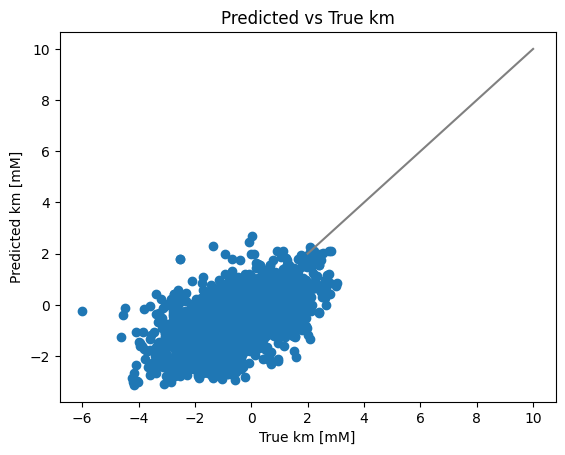

In [61]:
import matplotlib.pyplot as plt

#scatter plot of the results on the test set:
plt.scatter(test_y, test_pred)
plt.xlabel("True km [mM]")
plt.ylabel("Predicted km [mM]")
plt.title("Predicted vs True km")
#add grey diagonal line:
plt.plot([2, 10], [2, 10], 'grey')
plt.show()

Normalize descriptors

In [72]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ["LogP", "MW"]
scaler = StandardScaler()

# Fit on training set
train_df_scaled = train_df.copy()
train_df_scaled[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

# Apply to test set
test_df_scaled = test_df.copy()
test_df_scaled[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

Concatenate descriptors

In [75]:
df_train = train_df_scaled.copy()

def concat_descriptors_to_embedding(row):
    esm2 = np.array(row["esm2"])      
    pfam = np.array(row["domain_vector"])  
    bert = np.array(row["ChemBERTa2"]) 
    scalars = np.array([row["LogP"], row["MW"]])        
    final_embedding = np.concatenate([esm2, pfam, bert, scalars])
    return final_embedding.tolist()

df_train["esm2_pfam_ChemBERTa2_logP_MW"] = df_train.apply(concat_descriptors_to_embedding, axis=1)
df_train

ec       substrate     uniprot          smiles enzyme_type  \
0        3.5.2.6       meropenem      Q5I2N2  CC1C2C(C(=O...   wild type   
1       3.1.1.42    chlorogenate  A0A1B1WA13  C1C(C(C(CC1...   wild type   
2       2.6.1.13     l-ornithine      Q6LFH8  C(CC(C(=O)O...   wild type   
3       3.2.1.10      palatinose      C0JP83  C(C1C(C(C(C...   wild type   
4        2.4.2.3  5-Fluorouri...      Q8CGR7  C1=C(C(=O)N...   wild type   
...          ...             ...         ...             ...         ...   
13064  1.1.1.202            nad+  A0A0C1Q6R1  C1=CC(=C[N+...   wild type   
13065   2.8.2.22  4-nitrophen...      D6N7U5  C1=CC(=CC=C...   wild type   
13066   3.2.1.52  4-methylumb...      Q06GJ0  CC1=CC(=O)O...   wild type   
13067   1.18.1.6    ferricyanide      P9WIQ3  [C-]#N.[C-]...   wild type   
13068   6.2.1.12        caffeate  A0A0D4C3L0  C1=CC(=C(C=...   wild type   

                   km  km_count  km_gmean    log_km        sequence  ...  \
0               [4.5]         1  4.500000  0.653213  MNIKALLLITS...  ...   
1              [6.06]         1  6.060000  0.782473  MILIDHQTVSG...  ...   
2      [3.95, 2.3,...         5  1.813659  0.258556  MDFVKELKSSQ...  ...   
3               [7.1]         1  7.100000  0.851258  MTSFNREPLPD...  ...   
4             [0.206]         1  0.206000 -0.686133  MASILPASNRS...  ...   
...               ...       ...       ...       ...             ...  ...   
13064        [0.0904]         1  0.090400 -1.043832  MAERSYDFLMP...  ...   
13065        [0.0481]         1  0.048100 -1.317855  MTVLVRRRTRA...  ...   
13066         [0.107]         1  0.107000 -0.970616  MWSRRIPLFIF...  ...   
13067          [0.16]         1  0.160000 -0.795880  MRPYYIAIVGS...  ...   
13068        [0.2089]         1  0.208900 -0.680062  MGYEKSGYRES...  ...   

      esm2_mut      ChemBERTa2 esm2_ChemBERTa2   domain_vector  \
0          NaN  [-0.3071635...  [0.03155351...  [0.0, 0.0, ...   
1          NaN  [-0.8094091...  [-0.0634372...  [0.0, 0.0, ...   
2          NaN  [0.01034112...  [0.02418690...  [0.0, 0.0, ...   
3          NaN  [-0.4646347...  [-0.0140956...  [0.0, 0.0, ...   
4          NaN  [-0.3051195...  [0.03389621...  [0.0, 0.0, ...   
...        ...             ...             ...             ...   
13064      NaN  [1.7567083,...  [0.04837995...  [0.0, 0.0, ...   
13065      NaN  [0.02858685...  [0.00533546...  [0.0, 0.0, ...   
13066      NaN  [-0.2196180...  [0.04564097...  [0.0, 0.0, ...   
13067      NaN  [0.07944333...  [-0.0216483...  [0.0, 0.0, ...   
13068      NaN  [-0.848574,...  [0.00608632...  [0.0, 0.0, ...   

      esm2_ChemBERTa2_pfam       embedding      LogP        MW  log10_MW  \
0      [0.03155351...       [0.0, 0.0, ...  0.146842  0.238315  2.583731   
1      [-0.0634372...       [0.01284572...  0.029983  0.122248  2.549385   
2      [0.02418690...       [0.0, 0.0, ... -0.045030 -0.762009  2.121110   
3      [-0.0140956...       [0.00443734... -1.612651  0.074426  2.534403   
4      [0.03389621...       [0.0, 0.0, ... -0.684833 -0.244426  2.418621   
...               ...                  ...       ...       ...       ...   
13064  [0.04837995...       [0.0, 0.0, ... -1.008227  1.352691  2.821795   
13065  [0.00533546...       [0.08725829...  0.521870 -0.415663  2.340789   
13066  [0.04564097...       [-0.0532041...  0.054129  0.221975  2.579057   
13067  [-0.0216483...       [0.0, 0.0, ...  0.452467 -0.444406  2.326240   
13068  [0.00608632...       [-0.0241701...  0.666846 -0.570961  2.255656   

      esm2_pfam_ChemBERTa2_logP_MW  
0      [0.03155351...               
1      [-0.0634372...               
2      [0.02418690...               
3      [-0.0140956...               
4      [0.03389621...               
...               ...               
13064  [0.04837995...               
13065  [0.00533546...               
13066  [0.04564097...               
13067  [-0.0216483...               
13068  [0.00608632...               

[13069 rows x 25 columns]

In [ ]:
def concat_logp_to_embedding(row):
    embedding = np.array(row["esm2_ChemBERTa2"])        
    scalar = np.array([row["LogP"]])        
    final_embedding = np.concatenate([embedding, scalar])
    return final_embedding.tolist()

df_train["esm2_ChemBERTa2_logP"] = df_train.apply(concat_logp_to_embedding, axis=1)
df_train

ec       substrate     uniprot          smiles enzyme_type  \
0        3.5.2.6       meropenem      Q5I2N2  CC1C2C(C(=O...   wild type   
1       3.1.1.42    chlorogenate  A0A1B1WA13  C1C(C(C(CC1...   wild type   
2       2.6.1.13     l-ornithine      Q6LFH8  C(CC(C(=O)O...   wild type   
3       3.2.1.10      palatinose      C0JP83  C(C1C(C(C(C...   wild type   
4        2.4.2.3  5-Fluorouri...      Q8CGR7  C1=C(C(=O)N...   wild type   
...          ...             ...         ...             ...         ...   
13064  1.1.1.202            nad+  A0A0C1Q6R1  C1=CC(=C[N+...   wild type   
13065   2.8.2.22  4-nitrophen...      D6N7U5  C1=CC(=CC=C...   wild type   
13066   3.2.1.52  4-methylumb...      Q06GJ0  CC1=CC(=O)O...   wild type   
13067   1.18.1.6    ferricyanide      P9WIQ3  [C-]#N.[C-]...   wild type   
13068   6.2.1.12        caffeate  A0A0D4C3L0  C1=CC(=C(C=...   wild type   

                   km  km_count  km_gmean    log_km        sequence  ...  \
0               [4.5]         1  4.500000  0.653213  MNIKALLLITS...  ...   
1              [6.06]         1  6.060000  0.782473  MILIDHQTVSG...  ...   
2      [3.95, 2.3,...         5  1.813659  0.258556  MDFVKELKSSQ...  ...   
3               [7.1]         1  7.100000  0.851258  MTSFNREPLPD...  ...   
4             [0.206]         1  0.206000 -0.686133  MASILPASNRS...  ...   
...               ...       ...       ...       ...             ...  ...   
13064        [0.0904]         1  0.090400 -1.043832  MAERSYDFLMP...  ...   
13065        [0.0481]         1  0.048100 -1.317855  MTVLVRRRTRA...  ...   
13066         [0.107]         1  0.107000 -0.970616  MWSRRIPLFIF...  ...   
13067          [0.16]         1  0.160000 -0.795880  MRPYYIAIVGS...  ...   
13068        [0.2089]         1  0.208900 -0.680062  MGYEKSGYRES...  ...   

      esm2_mut      ChemBERTa2 esm2_ChemBERTa2   domain_vector  \
0          NaN  [-0.3071635...  [0.03155351...  [0.0, 0.0, ...   
1          NaN  [-0.8094091...  [-0.0634372...  [0.0, 0.0, ...   
2          NaN  [0.01034112...  [0.02418690...  [0.0, 0.0, ...   
3          NaN  [-0.4646347...  [-0.0140956...  [0.0, 0.0, ...   
4          NaN  [-0.3051195...  [0.03389621...  [0.0, 0.0, ...   
...        ...             ...             ...             ...   
13064      NaN  [1.7567083,...  [0.04837995...  [0.0, 0.0, ...   
13065      NaN  [0.02858685...  [0.00533546...  [0.0, 0.0, ...   
13066      NaN  [-0.2196180...  [0.04564097...  [0.0, 0.0, ...   
13067      NaN  [0.07944333...  [-0.0216483...  [0.0, 0.0, ...   
13068      NaN  [-0.848574,...  [0.00608632...  [0.0, 0.0, ...   

      esm2_ChemBERTa2_pfam       embedding     LogP       MW  log10_MW  \
0      [0.03155351...       [0.0, 0.0, ... -0.30800  383.470  2.583731   
1      [-0.0634372...       [0.01284572... -0.64590  354.311  2.549385   
2      [0.02418690...       [0.0, 0.0, ... -0.86280  132.163  2.121110   
3      [-0.0140956...       [0.00443734... -5.39560  342.297  2.534403   
4      [0.03389621...       [0.0, 0.0, ... -2.71280  262.193  2.418621   
...               ...                  ...      ...      ...       ...   
13064  [0.04837995...       [0.0, 0.0, ... -3.64790  663.430  2.821795   
13065  [0.00533546...       [0.08725829...  0.77640  219.174  2.340789   
13066  [0.04564097...       [-0.0532041... -0.57608  379.365  2.579057   
13067  [-0.0216483...       [0.0, 0.0, ...  0.57572  211.953  2.326240   
13068  [0.00608632...       [-0.0241701...  1.19560  180.159  2.255656   

      esm2_ChemBERTa2_logP  
0      [0.03155351...       
1      [-0.0634372...       
2      [0.02418690...       
3      [-0.0140956...       
4      [0.03389621...       
...               ...       
13064  [0.04837995...       
13065  [0.00533546...       
13066  [0.04564097...       
13067  [-0.0216483...       
13068  [0.00608632...       

[13069 rows x 25 columns]

In [ ]:
def concat_mw_to_embedding(row):
    embedding = np.array(row["esm2_ChemBERTa2"])        
    scalar = np.array([row["MW"]])        
    final_embedding = np.concatenate([embedding, scalar])
    return final_embedding.tolist()

df_train["esm2_ChemBERTa2_MW"] = df_train.apply(concat_mw_to_embedding, axis=1)
df_train

ec       substrate     uniprot          smiles enzyme_type  \
0        3.5.2.6       meropenem      Q5I2N2  CC1C2C(C(=O...   wild type   
1       3.1.1.42    chlorogenate  A0A1B1WA13  C1C(C(C(CC1...   wild type   
2       2.6.1.13     l-ornithine      Q6LFH8  C(CC(C(=O)O...   wild type   
3       3.2.1.10      palatinose      C0JP83  C(C1C(C(C(C...   wild type   
4        2.4.2.3  5-Fluorouri...      Q8CGR7  C1=C(C(=O)N...   wild type   
...          ...             ...         ...             ...         ...   
13064  1.1.1.202            nad+  A0A0C1Q6R1  C1=CC(=C[N+...   wild type   
13065   2.8.2.22  4-nitrophen...      D6N7U5  C1=CC(=CC=C...   wild type   
13066   3.2.1.52  4-methylumb...      Q06GJ0  CC1=CC(=O)O...   wild type   
13067   1.18.1.6    ferricyanide      P9WIQ3  [C-]#N.[C-]...   wild type   
13068   6.2.1.12        caffeate  A0A0D4C3L0  C1=CC(=C(C=...   wild type   

                   km  km_count  km_gmean    log_km        sequence  ...  \
0               [4.5]         1  4.500000  0.653213  MNIKALLLITS...  ...   
1              [6.06]         1  6.060000  0.782473  MILIDHQTVSG...  ...   
2      [3.95, 2.3,...         5  1.813659  0.258556  MDFVKELKSSQ...  ...   
3               [7.1]         1  7.100000  0.851258  MTSFNREPLPD...  ...   
4             [0.206]         1  0.206000 -0.686133  MASILPASNRS...  ...   
...               ...       ...       ...       ...             ...  ...   
13064        [0.0904]         1  0.090400 -1.043832  MAERSYDFLMP...  ...   
13065        [0.0481]         1  0.048100 -1.317855  MTVLVRRRTRA...  ...   
13066         [0.107]         1  0.107000 -0.970616  MWSRRIPLFIF...  ...   
13067          [0.16]         1  0.160000 -0.795880  MRPYYIAIVGS...  ...   
13068        [0.2089]         1  0.208900 -0.680062  MGYEKSGYRES...  ...   

      esm2_mut      ChemBERTa2 esm2_ChemBERTa2   domain_vector  \
0          NaN  [-0.3071635...  [0.03155351...  [0.0, 0.0, ...   
1          NaN  [-0.8094091...  [-0.0634372...  [0.0, 0.0, ...   
2          NaN  [0.01034112...  [0.02418690...  [0.0, 0.0, ...   
3          NaN  [-0.4646347...  [-0.0140956...  [0.0, 0.0, ...   
4          NaN  [-0.3051195...  [0.03389621...  [0.0, 0.0, ...   
...        ...             ...             ...             ...   
13064      NaN  [1.7567083,...  [0.04837995...  [0.0, 0.0, ...   
13065      NaN  [0.02858685...  [0.00533546...  [0.0, 0.0, ...   
13066      NaN  [-0.2196180...  [0.04564097...  [0.0, 0.0, ...   
13067      NaN  [0.07944333...  [-0.0216483...  [0.0, 0.0, ...   
13068      NaN  [-0.848574,...  [0.00608632...  [0.0, 0.0, ...   

      esm2_ChemBERTa2_pfam       embedding      LogP        MW  log10_MW  \
0      [0.03155351...       [0.0, 0.0, ...  0.146842  0.238315  2.583731   
1      [-0.0634372...       [0.01284572...  0.029983  0.122248  2.549385   
2      [0.02418690...       [0.0, 0.0, ... -0.045030 -0.762009  2.121110   
3      [-0.0140956...       [0.00443734... -1.612651  0.074426  2.534403   
4      [0.03389621...       [0.0, 0.0, ... -0.684833 -0.244426  2.418621   
...               ...                  ...       ...       ...       ...   
13064  [0.04837995...       [0.0, 0.0, ... -1.008227  1.352691  2.821795   
13065  [0.00533546...       [0.08725829...  0.521870 -0.415663  2.340789   
13066  [0.04564097...       [-0.0532041...  0.054129  0.221975  2.579057   
13067  [-0.0216483...       [0.0, 0.0, ...  0.452467 -0.444406  2.326240   
13068  [0.00608632...       [-0.0241701...  0.666846 -0.570961  2.255656   

      esm2_pfam_ChemBERTa2_logP_MW  
0      [0.03155351...               
1      [-0.0634372...               
2      [0.02418690...               
3      [-0.0140956...               
4      [0.03389621...               
...               ...               
13064  [0.04837995...               
13065  [0.00533546...               
13066  [0.04564097...               
13067  [-0.0216483...               
13068  [0.00608632...               

[13069 rows x 25 columns]

In [ ]:
def concat_emb_to_embedding(row):
    esm2_ChemBERTa2 = row.get("esm2_ChemBERTa2")
    embedding = row.get("embedding")

    if isinstance(esm2_ChemBERTa2, (list, np.ndarray)) and isinstance(embedding, (list, np.ndarray)):
        return list(esm2_ChemBERTa2) + list(embedding)
    else:
        return None

df_train["esm2_ChemBERTa2_emb"] = df_train.apply(concat_emb_to_embedding, axis=1)
df_train

ec       substrate     uniprot          smiles enzyme_type  \
0        3.5.2.6       meropenem      Q5I2N2  CC1C2C(C(=O...   wild type   
1       3.1.1.42    chlorogenate  A0A1B1WA13  C1C(C(C(CC1...   wild type   
2       2.6.1.13     l-ornithine      Q6LFH8  C(CC(C(=O)O...   wild type   
3       3.2.1.10      palatinose      C0JP83  C(C1C(C(C(C...   wild type   
4        2.4.2.3  5-Fluorouri...      Q8CGR7  C1=C(C(=O)N...   wild type   
...          ...             ...         ...             ...         ...   
13064  1.1.1.202            nad+  A0A0C1Q6R1  C1=CC(=C[N+...   wild type   
13065   2.8.2.22  4-nitrophen...      D6N7U5  C1=CC(=CC=C...   wild type   
13066   3.2.1.52  4-methylumb...      Q06GJ0  CC1=CC(=O)O...   wild type   
13067   1.18.1.6    ferricyanide      P9WIQ3  [C-]#N.[C-]...   wild type   
13068   6.2.1.12        caffeate  A0A0D4C3L0  C1=CC(=C(C=...   wild type   

                   km  km_count  km_gmean    log_km        sequence  ...  \
0               [4.5]         1  4.500000  0.653213  MNIKALLLITS...  ...   
1              [6.06]         1  6.060000  0.782473  MILIDHQTVSG...  ...   
2      [3.95, 2.3,...         5  1.813659  0.258556  MDFVKELKSSQ...  ...   
3               [7.1]         1  7.100000  0.851258  MTSFNREPLPD...  ...   
4             [0.206]         1  0.206000 -0.686133  MASILPASNRS...  ...   
...               ...       ...       ...       ...             ...  ...   
13064        [0.0904]         1  0.090400 -1.043832  MAERSYDFLMP...  ...   
13065        [0.0481]         1  0.048100 -1.317855  MTVLVRRRTRA...  ...   
13066         [0.107]         1  0.107000 -0.970616  MWSRRIPLFIF...  ...   
13067          [0.16]         1  0.160000 -0.795880  MRPYYIAIVGS...  ...   
13068        [0.2089]         1  0.208900 -0.680062  MGYEKSGYRES...  ...   

           ChemBERTa2 esm2_ChemBERTa2   domain_vector esm2_ChemBERTa2_pfam  \
0      [-0.3071635...  [0.03155351...  [0.0, 0.0, ...  [0.03155351...        
1      [-0.8094091...  [-0.0634372...  [0.0, 0.0, ...  [-0.0634372...        
2      [0.01034112...  [0.02418690...  [0.0, 0.0, ...  [0.02418690...        
3      [-0.4646347...  [-0.0140956...  [0.0, 0.0, ...  [-0.0140956...        
4      [-0.3051195...  [0.03389621...  [0.0, 0.0, ...  [0.03389621...        
...               ...             ...             ...             ...        
13064  [1.7567083,...  [0.04837995...  [0.0, 0.0, ...  [0.04837995...        
13065  [0.02858685...  [0.00533546...  [0.0, 0.0, ...  [0.00533546...        
13066  [-0.2196180...  [0.04564097...  [0.0, 0.0, ...  [0.04564097...        
13067  [0.07944333...  [-0.0216483...  [0.0, 0.0, ...  [-0.0216483...        
13068  [-0.848574,...  [0.00608632...  [0.0, 0.0, ...  [0.00608632...        

            embedding      LogP        MW  log10_MW  \
0      [0.0, 0.0, ...  0.146842  0.238315  2.583731   
1      [0.01284572...  0.029983  0.122248  2.549385   
2      [0.0, 0.0, ... -0.045030 -0.762009  2.121110   
3      [0.00443734... -1.612651  0.074426  2.534403   
4      [0.0, 0.0, ... -0.684833 -0.244426  2.418621   
...               ...       ...       ...       ...   
13064  [0.0, 0.0, ... -1.008227  1.352691  2.821795   
13065  [0.08725829...  0.521870 -0.415663  2.340789   
13066  [-0.0532041...  0.054129  0.221975  2.579057   
13067  [0.0, 0.0, ...  0.452467 -0.444406  2.326240   
13068  [-0.0241701...  0.666846 -0.570961  2.255656   

      esm2_pfam_ChemBERTa2_logP_MW esm2_ChemBERTa2_emb  
0      [0.03155351...               [0.03155351...      
1      [-0.0634372...               [-0.0634372...      
2      [0.02418690...               [0.02418690...      
3      [-0.0140956...               [-0.0140956...      
4      [0.03389621...               [0.03389621...      
...               ...                          ...      
13064  [0.04837995...               [0.04837995...      
13065  [0.00533546...               [0.00533546...      
13066  [0.04564097...               [0.04564097...      
13067  [-0.0216483..

In [79]:
df_test = test_df_scaled.copy()
df_test["esm2_pfam_ChemBERTa2_logP_MW"] = df_test.apply(concat_descriptors_to_embedding, axis=1)
df_test["esm2_ChemBERTa2_logP"] = df_test.apply(concat_logp_to_embedding, axis=1)
df_test["esm2_ChemBERTa2_MW"] = df_test.apply(concat_mw_to_embedding, axis=1)
df_test["esm2_ChemBERTa2_emb"] = df_test.apply(concat_emb_to_embedding, axis=1)
df_test

ec       substrate     uniprot          smiles enzyme_type  \
0       3.1.2.2  hexadecanoy...      Q86TX2  CCCCCCCCCCC...   wild type   
1     4.2.1.136  (6s)-6beta-...  A0A3L6F337  C1CC(=CN(C1...   wild type   
2       3.8.1.5  1-bromopropane      A6G7B1           CCCBr   wild type   
3      1.1.3.15  2-oxo-octan...      Q9UJM8  CCCCCCC(=O)...   wild type   
4     2.3.1.183  l-methionin...      Q9RV48  CS(=N)(=O)C...   wild type   
...         ...             ...         ...             ...         ...   
3244    2.6.1.2  2-oxoglutarate      Q9P9M8  C(CC(=O)O)C...   wild type   
3245    1.1.1.6        glycerol      P0A9S5      C(C(CO)O)O   wild type   
3246   4.3.1.18        d-serine      Q9HYN9  C(C(C(=O)O)N)O   wild type   
3247  1.11.1.19  reactive bl...      Q8EIU4  C1=CC=C2C(=...   wild type   
3248   1.2.1.19  3-aminoprop...      Q8VWZ1        C(CN)C=O   wild type   

               km  km_count   km_gmean    log_km        sequence  ...  \
0        [0.0036]         1   0.003600 -2.443697  MAATLILEPAG...  ...   
1       [0.00089]         1   0.000890 -3.050610  MSRPTGACLHA...  ...   
2          [45.2]         1  45.200000  1.655138  MEFVRTPDDRF...  ...   
3          [0.04]         1   0.040000 -1.397940  MLPRLICINDY...  ...   
4         [0.316]         1   0.316000 -0.500313  MTSVIRPAVIR...  ...   
...           ...       ...        ...       ...             ...  ...   
3244  [0.9, 0.02]         2   0.134164 -0.872364  MIRASKRALSV...  ...   
3245       [48.9]         1  48.900000  1.689309  MDRIIQSPGKY...  ...   
3246       [0.33]         1   0.330000 -0.481486  MILGTPKADWL...  ...   
3247      [0.084]         1   0.084000 -1.075721  MDIQNMPREQL...  ...   
3248      [0.075]         1   0.075000 -1.124939  MAITVSSRQLF...  ...   

     esm2_ChemBERTa2   domain_vector esm2_ChemBERTa2_pfam       embedding  \
0     [0.00087184...  [0.0, 0.0, ...  [0.00087184...       [0.0, 0.0, ...   
1     [0.01571535...  [0.0, 0.0, ...  [0.01571535...       [0.0, 0.0, ...   
2     [0.02354187...  [0.0, 0.0, ...  [0.02354187...       [0.0, 0.0, ...   
3     [0.04952269...  [0.0, 0.0, ...  [0.04952269...       [0.0, 0.0, ...   
4     [0.02561221...  [0.0, 0.0, ...  [0.02561221...       [0.0, 0.0, ...   
...              ...             ...             ...                  ...   
3244  [0.08342468...  [0.0, 0.0, ...  [0.08342468...       [-0.0384836...   
3245  [0.02809654...  [0.0, 0.0, ...  [0.02809654...       [0.0, 0.0, ...   
3246  [-0.0255774...  [0.0, 0.0, ...  [-0.0255774...       [0.0, 0.0, ...   
3247  [0.07807801...  [0.0, 0.0, ...  [0.07807801...       [0.0, 0.0, ...   
3248  [0.00413404...  [0.0, 0.0, ...  [0.00413404...       [0.0, 0.0, ...   

          LogP        MW esm2_pfam_ChemBERTa2_logP_MW esm2_ChemBERTa2_logP  \
0     1.687211  2.716111  [0.00087184...               [0.00087184...        
1    -0.913709  1.750780  [0.01571535...               [0.01571535...        
2     0.872862 -0.798510  [0.02354187...               [0.02354187...        
3     0.348743 -0.662393  [0.04952269...               [0.04952269...        
4     0.068326 -0.570683  [0.02561221...               [0.02561221...        
...        ...       ...             ...                          ...        
3244  0.082135 -0.706541  [0.08342468...               [0.08342468...        
3245 -0.323534 -0.921503  [0.02809654...               [0.02809654...        
3246 -0.303234 -0.869760  [-0.0255774...               [-0.0255774...        
3247  1.586053  1.793494  [0.07807801...               [0.07807801...        
3248  0.092234 -0.997128  [0.00413404...               [0.00413404...        

     esm2_ChemBERTa2_MW esm2_ChemBERTa2_emb  
0     [0.00087184...     [0.00087184...      
1     [0.01571535...     [0.01571535...      
2     [0.02354187...     [0.02354187...      
3     [0.04952269...     [0.04952269...      
4     [0.02561221...     [0.02561221...      
...              ...                ...      
3244  [0.08342468...     [0.08342468...      
3245 

In [92]:
df_train.to_pickle(join("partitions_pfam", "train_df.pkl"))
df_test.to_pickle(join("partitions_pfam", "test_df.pkl"))

In [83]:
# 5-fold cross validation is performed such that the same enzyme does not appear in different folds
data_train2 = train_df.copy()
data_train2["index"] = list(data_train2.index)

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=5)
indices_fold1 = list(df_fold["index"])
print(len(data_train2), len(indices_fold1))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=4)
indices_fold2 = list(df_fold["index"])
print(len(data_train2), len(indices_fold2))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=3)
indices_fold3 = list(df_fold["index"])
print(len(data_train2), len(indices_fold3))

data_train2, df_fold = split_dataframe_enzyme(df = data_train2, frac=2)
indices_fold4 = list(df_fold["index"])
indices_fold5 = list(data_train2["index"])
print(len(data_train2), len(indices_fold4))


fold_indices = [indices_fold1, indices_fold2, indices_fold3, indices_fold4, indices_fold5]

train_indices = [[] for _ in range(5)]
test_indices = [[] for _ in range(5)]

for i in range(5):
    for j in range(5):
        if i != j:
            train_indices[i] = train_indices[i] + fold_indices[j]
    test_indices[i] = fold_indices[i]

10459 2610
7717 2742
5224 2493
2679 2545


In [84]:
import pickle

train_file = join("partitions_pfam", "CV_train_indices.pkl")
test_file = join("partitions_pfam", "CV_test_indices.pkl")

with open(train_file, "wb") as f:
    pickle.dump(train_indices, f)

with open(test_file, "wb") as f:
    pickle.dump(test_indices, f)